<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/image_processing/stop_hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOP t√°bl√°k keres√©se k√©pekben (esettanulm√°ny)

Ebben az anyagban egy naiv algoritmust dolgzunk ki egy speci√°lis feladat megold√°s√°ra a sz√°m√≠t√≥g√©pes l√°t√°s ter√ºlet√©n. A c√©unk a STOP t√°bl√°k megtal√°l√°sa a k√©pekben.

Tervezett l√©p√©sek:

* Piros pixelek sz≈±r√©se a k√©pb≈ël
* Piros ter√ºletek konturj√°nak kikeres√©se
* Nyolcsz√∂glet≈± alakzatok kikeres√©se


In [ ]:
from math import sqrt
import numpy as np
import skimage
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull

El≈ësz√∂r t√∂lts√ºnk le egy STOP t√°bl√°t tartalmaz√≥ k√©pet az internetr≈ël √©s jelen√≠ts√ºk meg azt.

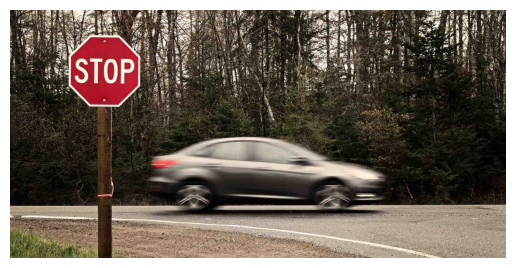

In [ ]:
img  = skimage.io.imread('https://images.contentstack.io/v3/assets/blt62d40591b3650da3/blt622f10521c0e0b74/658ee4941f895209f7912dfb/hero_PN1533_WhatIsRollingStop_Header.jpg?auto=webp&width=1440')
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
print()

Az RGB sz√≠nt√©rben nem tudjuk egyszer≈±en kiv√°lasztani a piros k√ºl√∂nb√∂z≈ë √°rnyalatait. Ez√©rt az RGB k√©pet HSV sz√≠nt√©rbe alak√≠tjuk √°t. Az skimage a HSV √©rt√©keket a 0-1 tartom√°nyba alak√≠tja √°t.

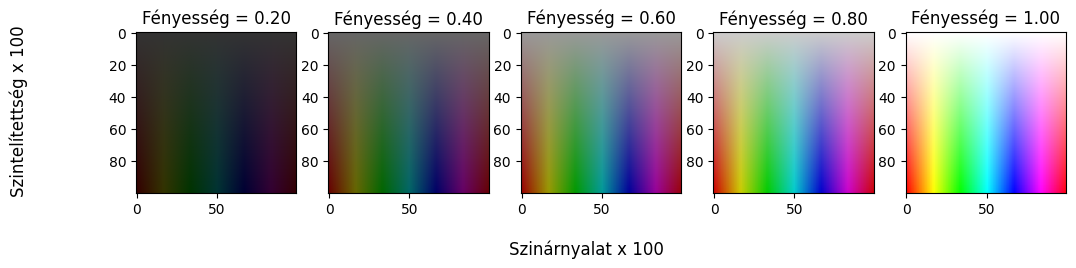

In [ ]:
isize = 100
h_scale = np.zeros((isize, isize, 3), dtype='float64')
h = np.arange(0.0, 1.0, 1 / h_scale.shape[1])
for i in range(isize):
        h_scale[i,:,0] = h
        h_scale[:,i,1] = h
icols = 5
fig, ax = plt.subplots(ncols=icols, figsize=(12, 3))
fig.supxlabel('Szin√°rnyalat x 100')
fig.supylabel('Szintel√≠tetts√©g x 100')
for i in range(icols):
    v = i / icols + 0.20
    h_scale[:,:,2] = v
    ax[i].imshow(skimage.color.hsv2rgb(h_scale))
    ax[i].set_title(f'F√©nyess√©g = {v:.2f}')

A fenti k√©pb≈ël felismerhetj√ºk, hogy a szintel√≠tetts√©gnek 0.6-n√°l nagyobbnak, a szin√°rnyalatnak 0.-n√©l kisebbnek kelllennie piros sz√≠n eset√©n. A f√©nyess√©gnek 0.3-n√°l nagyobb legyen, hogy a nagyon s√∂t√©r √°rnyalatokat elker√ºlj√ºk. A k√©p ter√ºlet√©nek 0.5%-√°n√°l kisebb ter√ºleteket √©s szigeteket t√∂r√∂lj√ºk

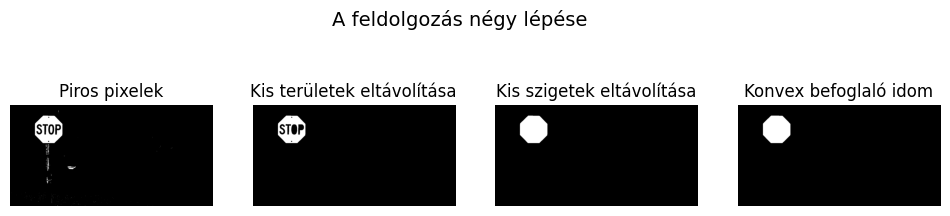

In [ ]:
img_hsv = skimage.color.rgb2hsv(img)
total_area = img.shape[0] * img.shape[1]
img1_bin = ((img_hsv[:,:,0] < 0.1) | (img_hsv[:,:,0] > 0.8)) & (img_hsv[:,:,1] > 0.6) & (img_hsv[:,:,2] > 0.3) # red pixels
fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
ax[0].set_title('Piros pixelek')
ax[0].imshow(img1_bin, cmap='gray')
ax[0].axis('off')
img2_bin = skimage.morphology.remove_small_objects(img1_bin, 0.005*total_area)
ax[1].set_title('Kis ter√ºletek elt√°vol√≠t√°sa')
ax[1].imshow(img2_bin, cmap='gray')
ax[1].axis('off')
img3_bin = skimage.morphology.remove_small_holes(img2_bin, 0.005*total_area)
ax[2].set_title('Kis szigetek elt√°vol√≠t√°sa')
ax[2].imshow(img3_bin, cmap='gray')
ax[2].axis('off')
img4_bin = skimage.morphology.convex_hull_image(img3_bin) # nem megfelle≈ë, ha t√∂bb STOp t√°bla vana k√©pen
ax[3].set_title('Konvex befoglal√≥ idom')
ax[3].imshow(img4_bin, cmap='gray')
ax[3].axis('off')
_ = fig.suptitle('A feldolgoz√°s n√©gy l√©p√©se', fontsize=14)

A fenti fekete-feh√©r k√©peken a piros pixelek feh√©r az √∂sszes t√∂bbi pixel fekete sz√≠nnel jelenek meg.

A konvex k√∂rvonal k√©pz√©se nem megfel≈ë, ha t√∂bb piros ter√ºlet van a k√©pen.

Z√°rt soksz√∂get k√©pez√ºnk a negyedik k√©pen l√°that√≥ feh√©r ter√ºlet k√∂rvonal√°b√≥l.

Stop t√°bla 274.4, 178.9


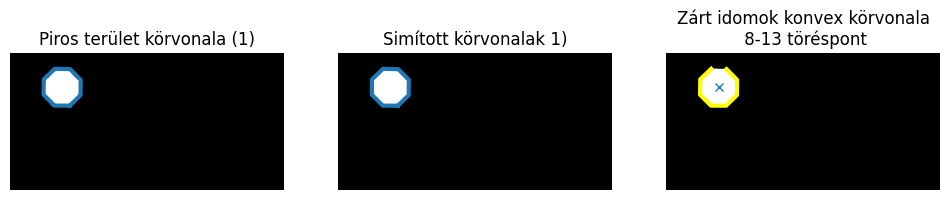

In [ ]:
cnts = skimage.measure.find_contours(img3_bin)
fig, ax = plt.subplots(ncols=3, figsize=(12, 3))
for i in range(3):
    ax[i].imshow(img3_bin, cmap='gray')
ax[0].set_title(f"Piros ter√ºlet k√∂rvonala ({len(cnts)})")
ax[0].axis('off')
ax[1].set_title(f"Sim√≠tott k√∂rvonalak {len(cnts)})")
ax[1].axis('off')
ax[2].set_title("Z√°rt idomok konvex k√∂rvonala\n 8-13 t√∂r√©spont")
ax[2].axis('off')
for contour in cnts:
    ax[0].plot(contour[:,1], contour[:,0], linewidth=3)
    appr = skimage.measure.approximate_polygon(contour, tolerance=5.0)
    ax[1].plot(appr[:,1], appr[:, 0], linewidth=3)
    hull = ConvexHull(appr)
    x = [appr[i,1] for i in hull.vertices]
    y = [appr[i,0] for i in hull.vertices]
    n = len(x)
    if 7 < n < 15:
        ax[2].plot(x, y, c='yellow', linewidth=3)
        center = sum(x) / n, sum(y) / n
        ax[2].plot(center[0], center[1], 'x', linewidth=3)
        print(f"Stop t√°bla {center[0]:.1f}, {center[1]:.1f}")

A bemutatott l√©p√©seket f√ºggv√©nyekbe √≠rtuk √°t, azzal a b≈ëv√≠t√©ssel, hogy t√∂bb piros ter√ºletet is kezeljen egy k√©pen.

A piros ter√ºletek k√∂rvonalait egyes√©vel vizsg√°ljuk, √≠gy t√∂bb STOP t√°bl√°t is tudunk detekt√°lni. Azt is vizsg√°ljuk, hogy a ter√ºletek k√∂rvonala tartalmazza-e egym√°st.

In [ ]:
def area(poly):
    """ calculate area of the polygon given as numpy array or list
    """
    coords = np.array(poly)
    coords1 = np.vstack((coords, coords[0]))    # first point to last
    return abs(np.sum((coords1[:-1, 0] - coords1[1:, 0]) * (coords1[:-1, 1] + coords1[1:, 1]))) / 2

def perimeter(poly):
    """ calculate perimeter of polygon given as numpy array or list
    """
    coords = np.array(poly)
    coords1 = np.vstack((coords, coords[0]))    # first point to last
    return np.sum(np.sqrt(np.sum(np.square(np.diff(coords1, axis=0)), axis=1)))

def stop_signs(img, area_limit=0.005):
    """ find stop traffic signal in image
        returns a list with the positions of the possible stop traffic signals and the convex hull of them
    """
    total_area = img.shape[0] * img.shape[1]
    img_hsv = skimage.color.rgb2hsv(img)
    img_bin = ((img_hsv[:,:,0] < 0.1) | (img_hsv[:,:,0] > 0.8)) & (img_hsv[:,:,1] > 0.6) & (img_hsv[:,:,2] > 0.3) # red pixels
    img_bin = skimage.morphology.remove_small_objects(img_bin, area_limit*total_area)
    img_bin = skimage.morphology.remove_small_holes(img_bin, area_limit*total_area)
    cnts = skimage.measure.find_contours(img_bin)
    res = []
    resp = []
    areas = []
    for contour in cnts:
        appr = skimage.measure.approximate_polygon(contour, tolerance=area_limit*max(img.shape))  # smooth border
        try:
            hull = ConvexHull(appr)
        except:
            continue
        if 6 < hull.vertices.shape[0] < 14:
            xy = appr[hull.vertices]
            contour_area = area(xy)
            contour_peri = perimeter(xy)
            a_p = sqrt(contour_area) / contour_peri     # shape parameter
            if contour_area / total_area > area_limit or \
                0.26 < a_p < 0.30: #    # skip small or narrow areas
                c = np.mean(xy, axis=0).reshape(1,2)
                # check if actual contour is inside a found one
                new = True
                for i, cent in enumerate(res):
                    if areas[i] > contour_area:
                        if skimage.measure.points_in_poly(c, resp[i])[0]:
                            new = False
                            break
                    else:
                        if skimage.measure.points_in_poly(res[i], xy)[0]:
                            res[i] = c
                            resp[i] = xy
                            areas[i] = contour_area
                            new = False
                            break
                if new:   # no overlaping
                    res.append(c)    # weight point of poly
                    resp.append(xy)
                    areas.append(contour_area)
    return res, resp

# Tesztel√©s

El≈ësz√∂r tesztelj√ºk a f√ºggv√©ny√ºnket az el≈ëz≈ëekben haszn√°lt k√©ppel.

In [ ]:
stop_signs(img)[0]

[array([[     178.88,      274.38]])]

A tesztel√©shez √∂sszegy≈±jt√∂tt√ºnk n√©h√°ny k√©pet az internetr≈ël.

In [ ]:
!wget -q 'https://media.defense.gov/2009/Dec/08/2000417879/825/780/0/091207-F-5660L-009.JPG' -O test1.jpg
!wget -q 'https://i0.wp.com/the-peak.ca/wp-content/uploads/2023/10/wgog2-scaled.jpg?fit=2560%2C1779&ssl=' -O test2.jpg
!wget -q 'https://as2.ftcdn.net/jpg/01/24/28/53/1000_F_124285397_19xwX3xepKr6sDmdBmZiT0PTTMMXHoF9.webp' -O test3.jpg

test1.jpg
test2.jpg
test3.jpg


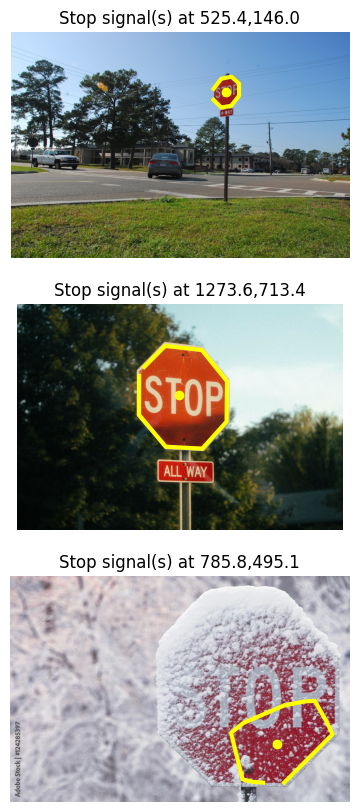

In [ ]:
img_paths = ['test1.jpg', 'test2.jpg', 'test3.jpg'
            ]
fig, ax = plt.subplots(nrows=len(img_paths), figsize=(5, 10))
for i, img_path in enumerate(img_paths):
    print(img_path)
    im = skimage.io.imread(img_path)
    ax[i].imshow(im)
    ax[i].axis('off')
    signs, polys = stop_signs(im)
    s = np.array(signs).reshape(-1,2)
    ax[i].plot(s[:,1], s[:,0], 'o', c="yellow")
    title = "Stop signal(s) at"
    for sign in signs:
        title += f" {sign[0,1]:.1f},{sign[0,0]:.1f}"
    for poly in polys:
        ax[i].plot(poly[:,1], poly[:,0], c="yellow", linewidth=3)
    ax[i].set_title(title)
#plt.tight_layout(w_pad=3)

#Feladatok

1. Tesztelje a f√ºggv√©nyt √∫jabb k√©pekkel!
2. B≈ëv√≠tse a f√ºggv√©nyt √∫jabb t√°blatipus felismer√©s√©vel.





# Megold√°s m√©lytanul√°ssal

A kor√°bban bemutatott algoritmus j√≥l m≈±k√∂dik, ha t√°bla k√∂rvonala j√≥l l√°tszik. Enn√©l rugalmasabb √©s r√©szben eltakart t√°bla eset√©n is alkalmazhat√≥ megold√°s az objektum detekt√°l√°s, mely konvol√∫ci√≥s neur√°lis h√°l√≥zatot (CNN) alkalmaz.

Itt egy k√©sz betan√≠tott modellt (YOLO5) haszn√°lunk, mely 80 f√©le objektum felismer√©s√©re tan√≠tott√°k meg sok-sok ezer k√©p felhaszn√°l√°s√°val. A 80 objektum k√∂z√ºl az egyik a STOP t√°bla.

In [ ]:
!pip install -q ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 36.3 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
model = YOLO("yolov5s.pt")  # small model, fast and lightweight

PRO TIP üí° Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
def yo(path):
    results = model(path)
    # Print results
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            label = model.names[cls]
            print(f"Detected {label} with confidence {conf:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")

    # Plot results using matplotlib
    annotated_img = results[0].plot()  # numpy array with drawn boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(annotated_img,cv2.COLOR_BGR2RGB))
    plt.axis("off")
    print()



image 1/1 /content/test1.jpg: 448x640 7 cars, 1 truck, 1 stop sign, 11.5ms
Speed: 2.1ms preprocess, 11.5ms inference, 4.3ms postprocess per image at shape (1, 3, 448, 640)
Detected stop sign with confidence 0.90 at [493, 108, 559, 185]
Detected car with confidence 0.89 at [331, 297, 418, 360]
Detected truck with confidence 0.62 at [45, 286, 166, 337]
Detected car with confidence 0.41 at [640, 337, 659, 346]
Detected car with confidence 0.39 at [43, 286, 167, 337]
Detected car with confidence 0.38 at [589, 334, 617, 345]
Detected car with confidence 0.36 at [556, 332, 587, 345]
Detected car with confidence 0.28 at [577, 334, 617, 345]
Detected car with confidence 0.25 at [530, 334, 558, 345]



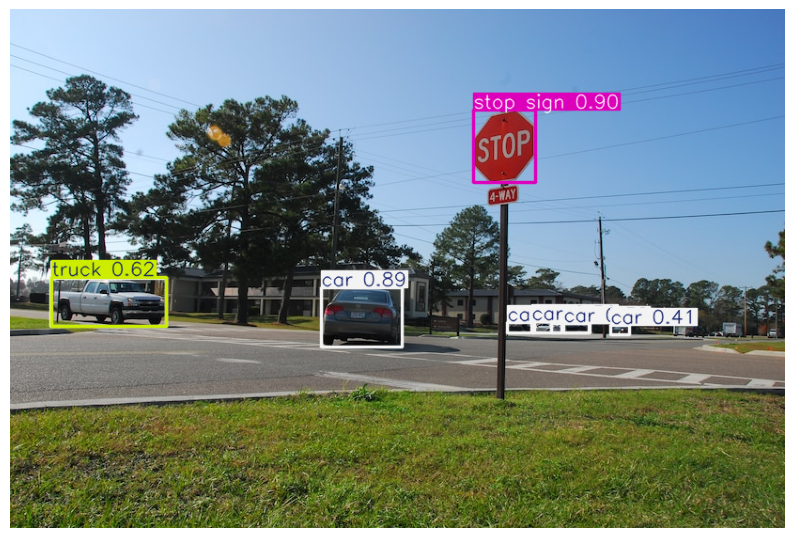

In [ ]:
yo('test1.jpg')


image 1/1 /content/test2.jpg: 448x640 1 stop sign, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Detected stop sign with confidence 0.95 at [934, 303, 1673, 1160]



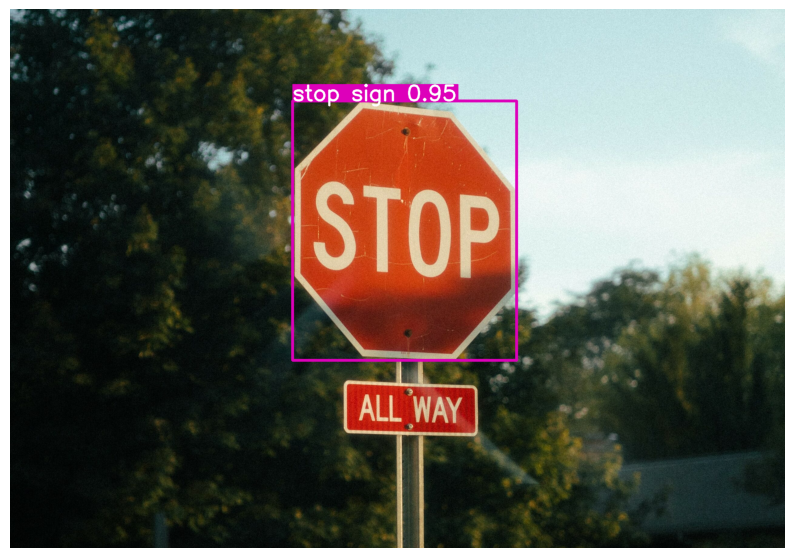

In [ ]:
yo('test2.jpg')


image 1/1 /content/test3.jpg: 448x640 1 stop sign, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Detected stop sign with confidence 0.95 at [428, 20, 975, 634]



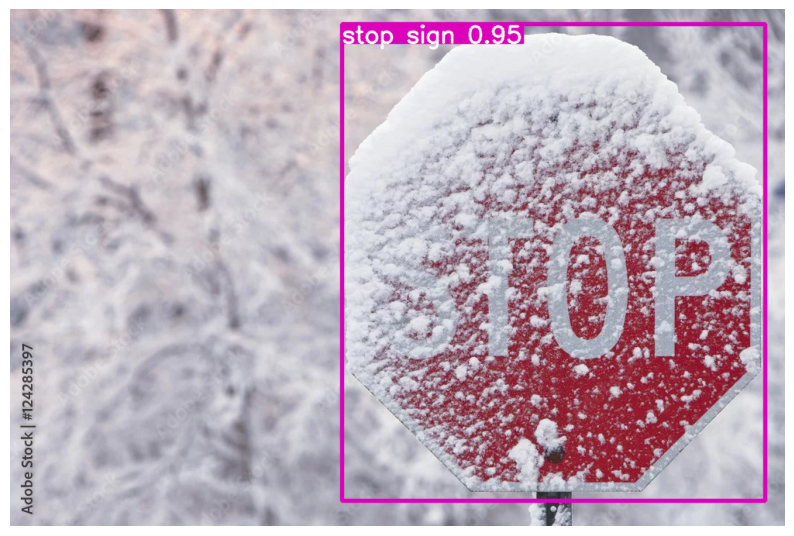

In [ ]:
yo('test3.jpg')